In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [0]:
url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3004/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1551178532&Signature=DxO5d%2BxLQpiqi0vPADdJRkPnU9YgBN7QlbpkJZE3W9axy%2Fknm5OlZBeCzAXOZ1PzyDmBSdiRmlTZv1IIySDYXNpfUAbvSFc0gINelaHgH254OuiRpUVJwV7D2GZIMww6uDIUHB9pnPjaABfm7f%2BaIMq5vtbzbYToNaZP%2BDDn9x9SKfqI6iIZCiDMsPVkXIfpahKpNdyCJ2O79Ux1JgCI3%2FmYjlK71rYrxwW%2FW2MFKQ1XLlIPo7PzzLCu0dx%2Bve9VADcAqnaT0pBkc70Wz8BObiO7wwZg9Q7m%2F4qA05bzUFm%2BXzxoNSIA5tpy3b4ClCdJWYX9FKmrgKF6AyWOX9IBGg%3D%3D'

train = pd.read_csv(url)
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
del train 

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size = 100, epochs = 50, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 34020 samples, validate on 3780 samples
Epoch 1/50
34020/34020 [==============================] - 11s 329us/step - loss: 0.6333 - acc: 0.8549 - val_loss: 0.0725 - val_acc: 0.9762
Epoch 2/50
34020/34020 [==============================] - 7s 195us/step - loss: 0.1219 - acc: 0.9634 - val_loss: 0.0511 - val_acc: 0.9831
Epoch 3/50
34020/34020 [==============================] - 7s 195us/step - loss: 0.0942 - acc: 0.9725 - val_loss: 0.0461 - val_acc: 0.9870
Epoch 4/50
34020/34020 [==============================] - 7s 199us/step - loss: 0.0760 - acc: 0.9777 - val_loss: 0.0452 - val_acc: 0.9862
Epoch 5/50
34020/34020 [==============================] - 7s 197us/step - loss: 0.0678 - acc: 0.9791 - val_loss: 0.0454 - val_acc: 0.9865
Epoch 6/50
34020/34020 [==============================] - 7s 194us/step - loss: 0.0614 - acc: 0.9807 - val_loss: 0.0416 - val_acc: 0.9886
Epoch 7/50
34020/34020 [==============================] - 7s 195us/step - 

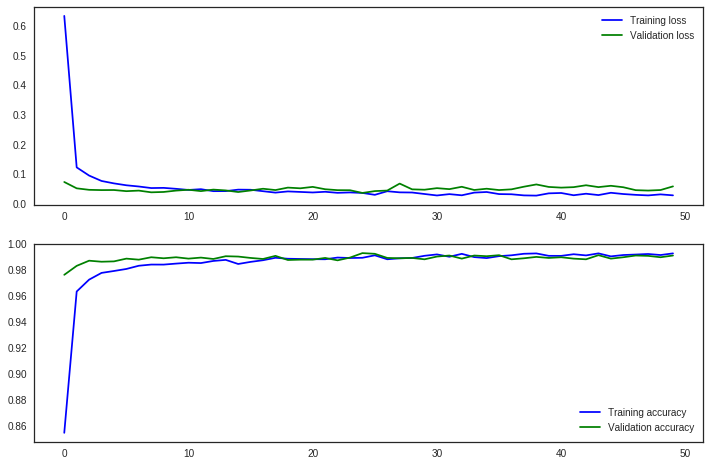

In [0]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(8)
fig.set_figwidth(12)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='g', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='g',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
Y_pred = model.predict(X_val)
print("Score: ", 1-np.sum([abs(x[1]-x[0]) for x in zip(Y_pred, Y_val)])/len(Y_val))

Score:  0.9822030512491862


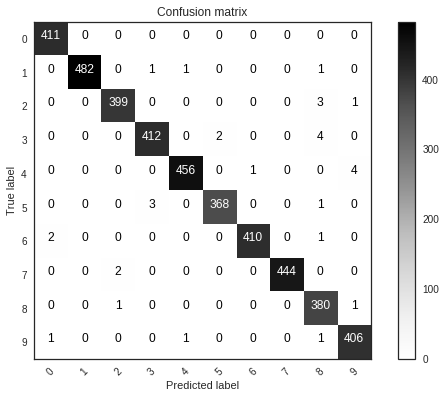

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 